<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/Gradua%C3%A7%C3%A3o/2024/20240312_RegressaoLinear_1a_Aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Carga de bibliotecas
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
# Carga de dados
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/mtcars.csv")

<Axes: xlabel='wt', ylabel='mpg'>

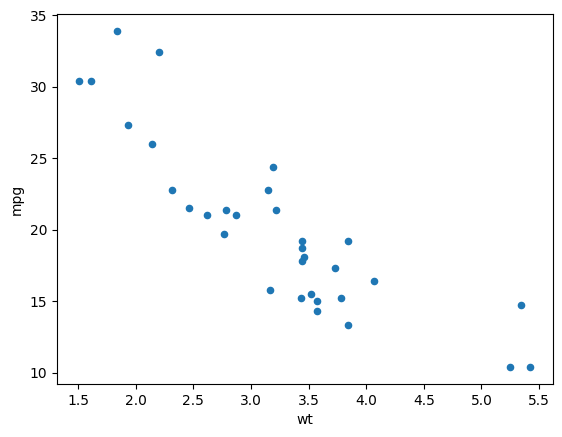

In [4]:
# Análise exploratória
df.plot.scatter(x='wt', y='mpg')

In [5]:
# Análise de correlação
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [44]:
x = df[['wt','cyl']]
y = df['mpg']
# Análise de regressão
mod = LinearRegression()
mod.fit(x,y)

# R2
print(mod.score(x,y))

0.8302273933294095


In [45]:
# Visualização das estatísticas da regressão
mod_sm = sm.OLS(y,x).fit()
print(mod_sm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.735
Model:                            OLS   Adj. R-squared (uncentered):              0.717
Method:                 Least Squares   F-statistic:                              41.60
Date:                Wed, 13 Mar 2024   Prob (F-statistic):                    2.23e-09
Time:                        01:00:01   Log-Likelihood:                         -121.50
No. Observations:                  32   AIC:                                      247.0
Df Residuals:                      30   BIC:                                      249.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<ipython-input-43-81f8a92fade7>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfPlot = dfPlot.append(df_fit)


<Axes: xlabel='wt', ylabel='mpg'>

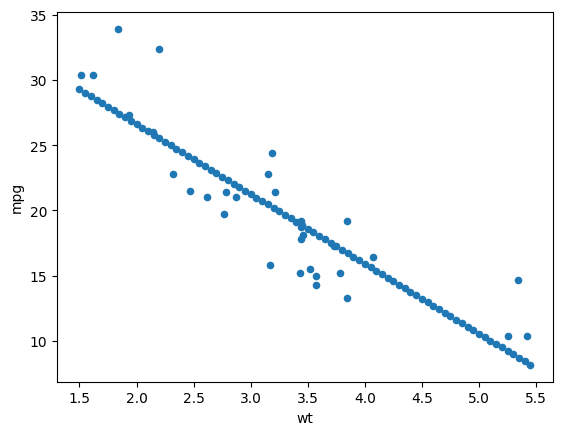

In [43]:
# Visualização da reta de regressão que aproxima o conjunto de pontos
dfPlot = x.copy(deep=True)
dfPlot['mpg'] = y

x_fit = np.arange(1.5, 5.5, 0.05)
df_fit = pd.DataFrame( {'wt':x_fit} )

y_fit = mod.predict(df_fit)

df_fit['mpg']=y_fit

dfPlot = dfPlot.append(df_fit)

dfPlot.plot.scatter(x='wt', y='mpg')
